# Evolución de la generación segun la epoca del año

In [28]:
import $ivy.`org.apache.spark::spark-sql:2.4.3`


import org.apache.spark.sql._
import org.apache.spark.sql.functions._
import org.apache.spark.sql.expressions.Window



//Reducir numero logs
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)


//For adding extra dependenies
import $ivy.`org.typelevel::cats-core:1.6.0`

//Plotly
import $ivy.`org.plotly-scala::plotly-almond:0.8.5`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._


//Iniciamos session de Spark
val spark = {
  NotebookSparkSession.builder()
     .master("local[*]")
    //.config("spark.executor.instances", "4") // Número de ejecutores
    //.config("spark.executor.memory", "4g") // Memoria por ejecutor
    //.config("spark.executor.cores", "2") // Núcleos por ejecutor
    //.config("spark.driver.memory", "4g") // Memoria del driver
    //.config("spark.sql.shuffle.partitions", "8") // Número de particiones para operaciones de shuffle
    .getOrCreate()
}
import spark.implicits._

Creating SparkSession

Spark UI

import $ivy.$
import org.apache.spark.sql._
import org.apache.spark.sql.functions._
import org.apache.spark.sql.expressions.Window
import org.apache.log4j.{Level, Logger}
import $ivy.$
import $ivy.$
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._


//Iniciamos session de Spark

spark: SparkSession = org.apache.spark.sql.SparkSession@3574757a
import spark.implicits._

In [50]:
val dfBalance: DataFrame = spark.read.parquet("../../data/parquet/dsBalanceNacional11-24.parquet")

val dfDemanda: DataFrame = spark.read.parquet("../../data/parquet/dsDemandaNacional14-24.parquet")

dfBalance: DataFrame = [Familia: string, Tipo: string ... 5 more fields]
dfDemanda: DataFrame = [Fecha: timestamp, Valor_previsto: bigint ... 5 more fields]

### Generación solar 2024

In [51]:
dfBalance.show()
dfDemanda.show()

+---------+----------+---------+-------------------+----------+-------------------+--------------+
|  Familia|      Tipo|Compuesto|         Porcentaje|     Valor|              Fecha|BajasEmisiones|
+---------+----------+---------+-------------------+----------+-------------------+--------------+
|Renovable|Hidráulica|    false| 0.2070493282098544| 73065.052|2014-01-01 01:00:00|          true|
|Renovable|Hidráulica|    false|0.23631205453294465| 89171.545|2014-01-02 01:00:00|          true|
|Renovable|Hidráulica|    false| 0.2735980903206654|102502.527|2014-01-03 01:00:00|          true|
|Renovable|Hidráulica|    false|0.24018151631870316|106840.706|2014-01-04 01:00:00|          true|
|Renovable|Hidráulica|    false|0.28984651129433686|117217.635|2014-01-05 01:00:00|          true|
|Renovable|Hidráulica|    false| 0.3229806730258387|110841.694|2014-01-06 01:00:00|          true|
|Renovable|Hidráulica|    false|0.40968176867979184| 137057.77|2014-01-07 01:00:00|          true|
|Renovable

+-------------------+--------------+-------------------+----------------+---------------------+----------+-------------------+
|              Fecha|Valor_previsto|Porcentaje_previsto|Valor_programado|Porcentaje_programado|Valor_real|    Porcentaje_real|
+-------------------+--------------+-------------------+----------------+---------------------+----------+-------------------+
|2023-01-31 14:55:00|         33015|0.33419712721051936|           33115|   0.3352093856603468|     32659|0.33059348712913383|
|2023-01-03 12:40:00|         29249|0.33273420169501167|           29400|  0.33445196518969345|     29256|0.33281383311529494|
|2023-01-21 05:30:00|         22130|0.33481095965021107|           21899|  0.33131609604066753|     22068|0.33387294430912146|
|2023-01-29 15:05:00|         28091| 0.3345998999452081|           27890|   0.3322057317102223|     27973|0.33319436834456967|
|2023-01-11 01:30:00|         25076| 0.3338747902963811|           24859|   0.3309855404361835|     25171| 0.33

cmd70.sc:29: method apply in object Font is deprecated (since 0.8.0): Use Font() and chain-call .with* methods on it instead
    .withFont(Font(size = 12, color = Color.RGB(0, 0, 0)))
              ^


+------+------------------+
|Semana|  Producción Total|
+------+------------------+
|     1|100787.70710333335|
|     2|111132.69199222547|
|     3|113329.65220845482|
|     4|112779.48270359573|
|     5|110765.44068285575|
|     6| 111896.5844509232|
|     7|109264.26252623906|
|     8|106920.51107479358|
|     9|107917.81317687075|
|    10|105550.01534839651|
|    11|  103412.225838271|
|    12|100718.88280300822|
|    13| 98564.74592569208|
|    14|  97518.4505621963|
|    15| 96328.26435648375|
|    16| 94846.58888586692|
|    17| 95316.60509611649|
|    18| 93134.66747013117|
|    19| 95894.71588198154|
|    20| 95512.05963737864|
+------+------------------+
only showing top 20 rows



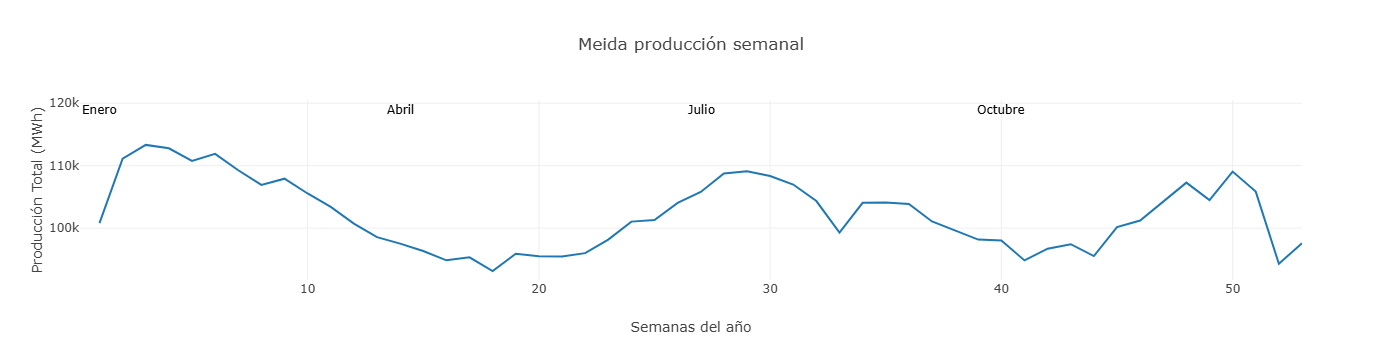

defined function produccionSemanal

In [70]:
def produccionSemanal(): Unit = {
    
// Filtrar los datos del año 2024 y del tipo "Solar fotovoltaica"
  val dfFiltrado = dataFrameBalance
    .withColumn("Semana", weekofyear($"Fecha")) // Extraer el número de semana
    .groupBy($"Semana")
    .agg(avg("Valor").as("Producción Total")) // Sumar la producción por semana
    .orderBy("Semana")


dfFiltrado.show()

// Lista de meses en orden correcto
val xSemanas = dfFiltrado.select("Semana").as[Int].collect().toSeq
val xMeses = Seq("Enero", "Abril", "Julio", "Octubre")

// Asegurar que todos los meses tengan valores (rellenar con 0 si faltan datos)
val yDatos =  dfFiltrado.select("Producción Total").as[Double].collect().toSeq

val traceSolar = Scatter(xSemanas, yDatos)
    .withName("Producción semanal")

val anotaciones = posicionesMeses.zip(nombresMeses).map { case (pos, mes) =>
  Annotation()
    .withX(pos)
    .withY(yDatos.max * 1.05) // Ubicar arriba del gráfico
    .withText(mes)
    .withShowarrow(false)
    .withFont(Font(size = 12, color = Color.RGB(0, 0, 0)))
}
// Crear la traza para la gráfica
val data = Seq(traceSolar)

// Configuración del diseño del gráfico
val lay = Layout()
    .withTitle("Meida producción semanal")
    .withXaxis(Axis().withTitle("Semanas del año").withTickmode(TickMode.Array))
    .withYaxis(Axis().withTitle("Producción Total (MWh)"))
    .withAnnotations(anotaciones)


// Renderizar el gráfico
plot(data, lay)

    
}
produccionSemanal

In [71]:
dfDemanda.show()

+-------------------+--------------+-------------------+----------------+---------------------+----------+-------------------+
|              Fecha|Valor_previsto|Porcentaje_previsto|Valor_programado|Porcentaje_programado|Valor_real|    Porcentaje_real|
+-------------------+--------------+-------------------+----------------+---------------------+----------+-------------------+
|2023-01-31 14:55:00|         33015|0.33419712721051936|           33115|   0.3352093856603468|     32659|0.33059348712913383|
|2023-01-03 12:40:00|         29249|0.33273420169501167|           29400|  0.33445196518969345|     29256|0.33281383311529494|
|2023-01-21 05:30:00|         22130|0.33481095965021107|           21899|  0.33131609604066753|     22068|0.33387294430912146|
|2023-01-29 15:05:00|         28091| 0.3345998999452081|           27890|   0.3322057317102223|     27973|0.33319436834456967|
|2023-01-11 01:30:00|         25076| 0.3338747902963811|           24859|   0.3309855404361835|     25171| 0.33

cmd80.sc:25: method apply in object Scatter is deprecated (since 0.8.0): Use Scatter() and chain-call .with* methods on it instead
    val trace1 = Scatter(seqHoras, seqDemanda1, name = "Demanda Junio")
                 ^
cmd80.sc:26: method apply in object Scatter is deprecated (since 0.8.0): Use Scatter() and chain-call .with* methods on it instead
    val trace2 = Scatter(seqHoras, seqDemanda2, name = "Demanda Diciembre")
                 ^


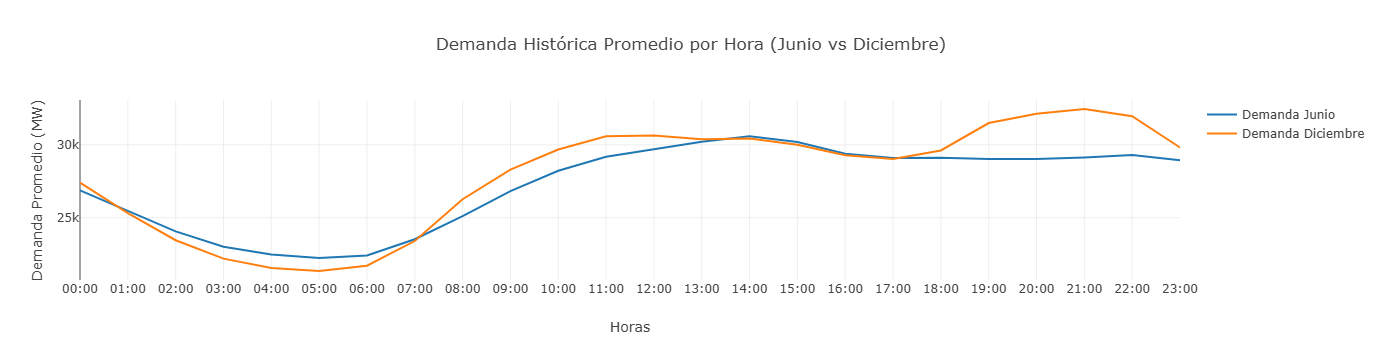

defined function demandaHistoricoPromedioPorHora

In [80]:
def demandaHistoricoPromedioPorHora(dfDemanda: DataFrame): Unit = {
    val junio = 6
    val diciembre = 12
    
    val todasLasHoras = (0 to 23).map(h => f"$h%02d:00") // ["00:00", "01:00", ..., "23:00"]

    val df1 = dfDemanda
        .filter(month($"Fecha") === junio)
        .select("Valor_real", "Fecha")
        .groupBy(date_format(col("Fecha"), "HH").as("Hora"))
        .agg(avg("Valor_real").as("PromedioPorHora"))
        .orderBy(col("Hora"))
    
     val df2 = dfDemanda
        .filter(month($"Fecha") === diciembre)
        .select("Valor_real", "Fecha")
        .groupBy(date_format(col("Fecha"), "HH").as("Hora"))
        .agg(avg("Valor_real").as("PromedioPorHora"))
        .orderBy(col("Hora"))

    val seqDemanda1 = df1.select("PromedioPorHora").as[Double].collect.toSeq
    val seqDemanda2 = df2.select("PromedioPorHora").as[Double].collect.toSeq
    val seqHoras = df1.select("Hora").as[String].collect.toSeq

    val trace1 = Scatter(seqHoras, seqDemanda1, name = "Demanda Junio")
    val trace2 = Scatter(seqHoras, seqDemanda2, name = "Demanda Diciembre")

    val data = Seq(trace1, trace2)
    
    val layout = Layout()
        .withTitle("Demanda Histórica Promedio por Hora (Junio vs Diciembre)")
        .withXaxis(
                Axis()
                .withTitle("Horas")
                .withTickmode(TickMode.Array)
                .withTickvals((0 to 23))
                .withTicktext(todasLasHoras)
        )
        .withYaxis(Axis().withTitle("Demanda Promedio (MW)"))
        
    
    plot(data, layout)
}

// Ejemplo de uso
demandaHistoricoPromedioPorHora(dfDemanda)

In [78]:
 val todasLasHoras = (0 to 23).map(h => f"$h%02d:00") // ["00:00", "01:00", ..., "23:00"]

todasLasHoras: collection.immutable.IndexedSeq[String] = Vector(
  "00:00",
  "01:00",
  "02:00",
  "03:00",
  "04:00",
  "05:00",
  "06:00",
  "07:00",
  "08:00",
  "09:00",
  "10:00",
  "11:00",
  "12:00",
  "13:00",
  "14:00",
  "15:00",
  "16:00",
  "17:00",
  "18:00",
  "19:00",
  "20:00",
  "21:00",
  "22:00",
  "23:00"
)

In [81]:
dfBalance.show()

+---------+----------+---------+-------------------+----------+-------------------+--------------+
|  Familia|      Tipo|Compuesto|         Porcentaje|     Valor|              Fecha|BajasEmisiones|
+---------+----------+---------+-------------------+----------+-------------------+--------------+
|Renovable|Hidráulica|    false| 0.2070493282098544| 73065.052|2014-01-01 01:00:00|          true|
|Renovable|Hidráulica|    false|0.23631205453294465| 89171.545|2014-01-02 01:00:00|          true|
|Renovable|Hidráulica|    false| 0.2735980903206654|102502.527|2014-01-03 01:00:00|          true|
|Renovable|Hidráulica|    false|0.24018151631870316|106840.706|2014-01-04 01:00:00|          true|
|Renovable|Hidráulica|    false|0.28984651129433686|117217.635|2014-01-05 01:00:00|          true|
|Renovable|Hidráulica|    false| 0.3229806730258387|110841.694|2014-01-06 01:00:00|          true|
|Renovable|Hidráulica|    false|0.40968176867979184| 137057.77|2014-01-07 01:00:00|          true|
|Renovable